In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

import os
import glob
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
dates = ['201601' , '201602' , '201501' , '201502']
for date in dates:
    getCitiBikeCSV(date)

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [4]:
citibike_2016 = pd.concat([pd.read_csv(f) for f in glob.glob(os.getenv('PUIDATA')+ '/20160[12]-citibike-tripdata.csv')])
citibike_2015 = pd.concat([pd.read_csv(f) for f in glob.glob(os.getenv('PUIDATA')+ '/20150[12]-citibike-tripdata.csv')])

In [5]:

citibike_2016['date'] = pd.to_datetime(citibike_2016['starttime'],infer_datetime_format=True)
citibike_2015['date'] = pd.to_datetime(citibike_2015['starttime'],infer_datetime_format=True)

In [6]:
cb = pd.concat([citibike_2016,citibike_2015],ignore_index=True)

In [7]:
cb_df = cb[['tripduration','date']]

# Idea:

### People are not very keen to follow up on their new years resolutions 
At the beginning of the new year, people are very enthusiastic about folloing their New Years Resolutions. People sign up for gyms, citibikes etc in a quest for better health. However, many of them often fail to follow through after the first month. We see if this hypothesis holds weight. Should it hold true, citibike can incentivize the subscribers by providing them appropriate discounts etc to help them stick to their riderships.

# Null Hypothesis

###  $H_{0}$ : Proportion of people riding bikes after January(in February) is same or more than that of January.

###  $H_{a}$ :Proportion of people riding bikes after January(in February) is less than that of January.


# Mathematical formulation of null hypothesis

###  $H_{0}$ : $Proportion of people_{riding bikes after January(FEBRUARY)}$ >= $Proportion of people_{riding bikes in January}$

###  $H_{a}$ : $Proportion of people_{riding bikes after January(FEBRUARY)}$ <  $Proportion of people_{riding bikes inJanuary}$

## significance level  $\alpha=0.05$


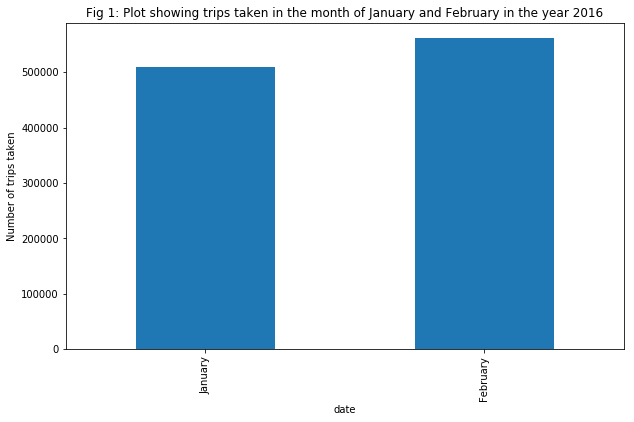

In [19]:
fig, ax = plt.subplots()

plot1 = (cb_df[cb_df['date'].dt.year == 2016].groupby(cb_df['date'].dt.month)[['tripduration']].count()).plot(kind='bar',ax=ax,legend=False)
tmp = ax.xaxis.set_ticklabels(['January', 'February'], fontsize=10)
ax.set_ylabel('Number of trips taken')
ax.set_title('Fig 1: Plot showing trips taken in the month of January and February in the year 2016')
savefig('fig1.png')

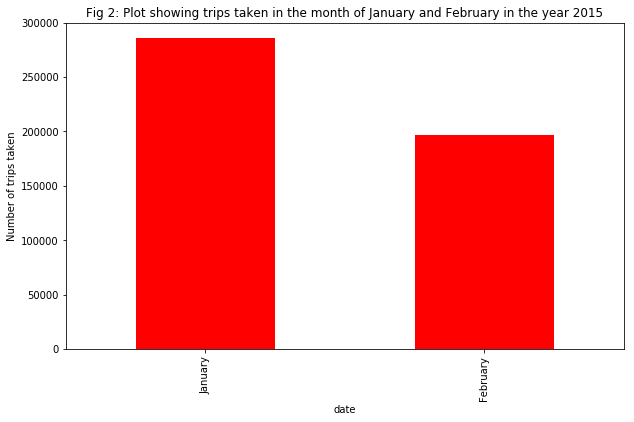

In [20]:
fig, ax = plt.subplots()
(cb_df[cb_df['date'].dt.year == 2015].groupby(cb_df['date'].dt.month)[['tripduration']].count()).plot(kind='bar',ax=ax,color='red',legend=False)

tmp = ax.xaxis.set_ticklabels(['January', 'February'], fontsize=10)
ax.set_ylabel('Number of trips taken')
ax.set_title('Fig 2: Plot showing trips taken in the month of January and February in the year 2015')
savefig('fig2.png')

# Hypothesis Testing:

Following Devashish's suggestion, the Z test for proportions was employed to test this hypothesis

In [10]:
total_trips_January = cb_df.groupby(cb_df['date'].dt.month == 1)[['tripduration']].count()
total_trips_February = cb_df.groupby(cb_df['date'].dt.month == 2)[['tripduration']].count()
total_trips = cb_df.shape[0]
j = total_trips_January.reset_index()
f = total_trips_February.reset_index()
num_J = j.iloc[1][1]
num_F = f.iloc[1][1]

# We use the z square test of proportion
alpha=0.05
# 0 for february, 1 for january
P_0= num_F/total_trips
P_1= num_J/total_trips

n_0= num_F
n_1= num_J

In [12]:
#calculate sample proportion

p  = ((P_0 * n_0) + (P_1 * n_1 )) / (n_0 + n_1)
print('Sample Proportion: ' + str(p))

#calculate the standard error

se = np.sqrt( p * (1-p) * (1.0/n_0 + 1.0/n_1))
print('Standard Error: '+ str(se))
z_3y = (P_0 - P_1)/se

print('The Z statistic is : ' + str(z_3y))

Sample Proportion: 0.500287350983
Standard Error: 0.000802716598408
The Z statistic is : -29.8647647533


January: 0.512, February:0.716, January error:0.488, February error:0.699


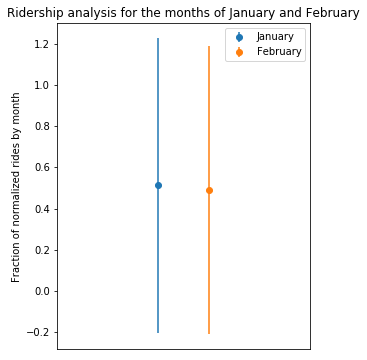

In [21]:
#Proportion of ridership graphs for January and February
fig = pl.figure(figsize(10,6))
ax1 = fig.add_subplot(121)

ax1.set_xticks([])

# P_0 : ridership in February P_1 : ridership in january
error_j = np.sqrt(P_1)
error_f = np.sqrt(P_0)

print("January: {0:.3f}, February:{1:.3f}, January error:{2:.3f}, February error:{3:.3f}"\
      .format(P_1, error_j, P_0, error_f))

ax1.errorbar([0.2], [P_1], yerr=[error_j], fmt='o', label='January')
ax1.errorbar([0.3], [P_0], yerr=[error_f], fmt='o', label='February')
ax1.set_xlim(0, 0.5)

ax1.set_title("Ridership analysis for the months of January and February")
ax1.set_ylabel("Fraction of normalized rides by month")

pl.legend()
savefig('fig3.png')

#### Fig 3: Plot showing the normalized ridership for the months of January and February

In [13]:

def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

In [14]:
#we take the value of the z score from the table to be 0.9984
p_3y = 1 - 0.9984

report_result(p_3y, alpha)

is the p value 0.00 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected


## Justification:

We use the 2 proportion Z test because:
* the samples are independent.
* the sample size are > 30


## Conclusion: 

Thus, we reject the null hypothesis that the proprotion of bike ridership is higher in February than January.
The ridership does change once from January to February.

### Strengths

* The sample sizes are large enough



### Shortcomings and Limitations:

* The data is not enough to generalize this trend because we have only used data available for two years. 

* We dont have any information about the riders who used Citibike to fulfill their New Years resolution.

